In [31]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [32]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [73]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
data = pd.read_csv(url,header=None)
import warnings
warnings.filterwarnings('ignore')

In [80]:
#data[279].value_counts().sort_index()

In [83]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (452, 280)
0        56
1         1
2       165
3        64
4        81
5       174
6       401
7       149
8        39
9        25
10       37
11      -17
12       31
13        ?
14       53
15        0
16       48
17        0
18        0
19        0
20       24
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28       64
29        0
       ... 
250       0
251     9.5
252      -5
253       0
254       0
255     0.5
256     2.6
257    11.8
258    34.6
259    -0.4
260       0
261      11
262    -2.4
263       0
264       0
265     0.4
266     2.6
267    21.6
268    43.4
269    -0.5
270       0
271     8.5
272       0
273       0
274       0
275     0.2
276     2.1
277    20.4
278    38.8
279       6
Name: 1, Length: 280, dtype: object


In [84]:
arrythmia.loc[280:]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
280,0,51,2.0,0,0.0,0.0,0,0,0,284.0,132.0,78.0,21.94,68.0,94.0,1
281,0,60,3.0,0,0.0,0.0,0,0,0,325.0,123.0,79.0,25.82,63.0,85.0,0
282,0,35,2.0,0,0.0,0.0,0,0,0,208.0,122.5,72.5,22.00,65.0,NaN,0
283,0,39,4.0,0,0.0,0.0,0,0,0,260.0,100.0,74.5,20.51,96.0,66.0,0
284,1,68,1.0,0,0.0,0.0,0,1,1,164.0,142.0,85.0,30.28,70.0,120.0,1
285,0,54,2.0,0,0.0,0.0,0,0,0,270.0,98.0,64.0,22.02,67.0,75.0,0
286,0,38,2.0,0,0.0,0.0,0,0,0,186.0,105.0,57.0,21.10,85.0,68.0,0
287,1,39,2.0,0,0.0,0.0,0,0,0,258.0,105.0,69.0,24.10,52.0,79.0,0
288,0,36,2.0,1,5.0,0.0,0,0,0,228.0,111.0,68.0,23.86,88.0,68.0,0
289,1,36,4.0,1,30.0,0.0,0,0,0,155.0,126.0,72.0,25.14,50.0,70.0,0


In [86]:
# remove missing data (indicated with a "?")
data_ = arrythmia[~arrythmia.isin(['?'])]
data.loc[280:]

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
280,41,0,175,97,91,198,402,254,143,-4,...,0.0,7.1,-3.3,0.5,0.0,0.6,1.1,15.0,25.7,1
281,49,0,170,80,102,148,350,168,111,-39,...,0.0,10.5,-4.0,0.0,0.0,0.5,3.0,15.3,45.3,1
282,57,0,175,81,80,163,364,169,118,8,...,0.0,5.3,0.0,0.0,0.0,0.4,1.5,12.7,26.2,1
283,35,1,165,95,82,133,399,162,101,-19,...,0.0,5.4,-2.1,0.0,0.0,0.5,1.4,5.8,16.7,6
284,73,0,165,58,104,0,372,159,117,-26,...,0.0,5.6,-1.4,0.0,0.0,-0.3,1.7,9.5,23.7,10
285,65,0,175,65,85,161,373,147,143,-49,...,-0.5,8.1,-1.0,0.0,0.0,0.2,-0.5,16.6,12.7,3
286,33,1,160,69,83,174,381,125,83,69,...,0.0,12.3,0.0,0.0,0.0,0.4,1.1,34.4,41.2,1
287,35,1,155,58,81,184,386,153,89,73,...,0.0,6.3,-0.5,0.0,0.0,0.5,1.9,15.4,31.3,1
288,57,0,175,70,94,148,382,147,100,46,...,-1.2,5.7,0.0,0.0,0.0,0.4,0.7,17.7,21.9,1
289,50,1,163,58,84,145,370,143,73,0,...,0.0,6.3,-0.6,0.0,0.0,0.4,1.4,16.4,27.3,1


In [87]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
280,41,0,175,97,91,198,402,254,143,-4,...,0.0,7.1,-3.3,0.5,0.0,0.6,1.1,15.0,25.7,1
281,49,0,170,80,102,148,350,168,111,-39,...,0.0,10.5,-4.0,0.0,0.0,0.5,3.0,15.3,45.3,1
282,57,0,175,81,80,163,364,169,118,8,...,0.0,5.3,0.0,0.0,0.0,0.4,1.5,12.7,26.2,1
283,35,1,165,95,82,133,399,162,101,-19,...,0.0,5.4,-2.1,0.0,0.0,0.5,1.4,5.8,16.7,6
284,73,0,165,58,104,0,372,159,117,-26,...,0.0,5.6,-1.4,0.0,0.0,-0.3,1.7,9.5,23.7,10
285,65,0,175,65,85,161,373,147,143,-49,...,-0.5,8.1,-1.0,0.0,0.0,0.2,-0.5,16.6,12.7,3
286,33,1,160,69,83,174,381,125,83,69,...,0.0,12.3,0.0,0.0,0.0,0.4,1.1,34.4,41.2,1
287,35,1,155,58,81,184,386,153,89,73,...,0.0,6.3,-0.5,0.0,0.0,0.5,1.9,15.4,31.3,1
288,57,0,175,70,94,148,382,147,100,46,...,-1.2,5.7,0.0,0.0,0.0,0.4,0.7,17.7,21.9,1
289,50,1,163,58,84,145,370,143,73,0,...,0.0,6.3,-0.6,0.0,0.0,0.4,1.4,16.4,27.3,1


In [88]:
from tensorflow.keras.utils import to_categorical

In [89]:
print(data.shape)
print(data.dtypes)

(452, 280)
0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10      object
11      object
12      object
13      object
14      object
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
        ...   
250    float64
251    float64
252    float64
253    float64
254    float64
255    float64
256    float64
257    float64
258    float64
259    float64
260    float64
261    float64
262    float64
263    float64
264    float64
265    float64
266    float64
267    float64
268    float64
269    float64
270    float64
271    float64
272    float64
273    float64
274    float64
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object


In [90]:
# transform data to numeric to enable further analysis
data = data.copy().replace('?', '0')
data = data.apply(pd.to_numeric)
data.dtypes

# data.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
        ...   
250    float64
251    float64
252    float64
253    float64
254    float64
255    float64
256    float64
257    float64
258    float64
259    float64
260    float64
261    float64
262    float64
263    float64
264    float64
265    float64
266    float64
267    float64
268    float64
269    float64
270    float64
271    float64
272    float64
273    float64
274    float64
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object

In [64]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


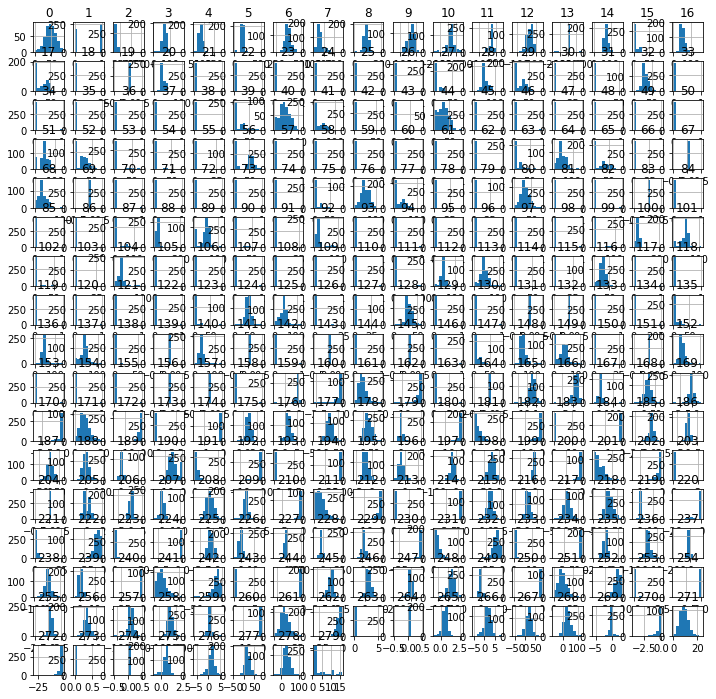

In [65]:
data.hist(figsize = (12, 12))
plt.show()

In [72]:
len(data[56].value_counts())

21

In [99]:
from sklearn import model_selection

from sklearn import model_selection

X = np.array(data.drop([279], 1))
y = np.array(data[279])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [100]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])
X_train.shape
# #not sure why it finds 17 categories? But
# pd.DataFrame(Y_train).sum()

(361, 17)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(361, 279)

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
# def create_model():
    # create model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))

# compile model
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#     return model

# model = create_model()

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                4480      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 17)                153       
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=13, verbose = 10)

Train on 361 samples, validate on 91 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Ep

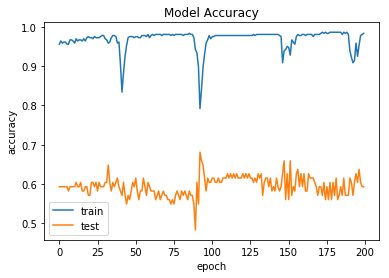

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

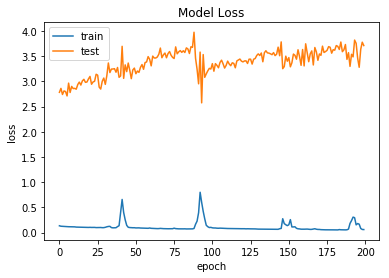

In [107]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [111]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(361, 279)

In [113]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                4480      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, batch_size=10, verbose = 10)

Train on 361 samples, validate on 91 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Ep

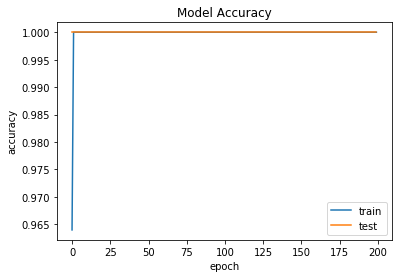

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

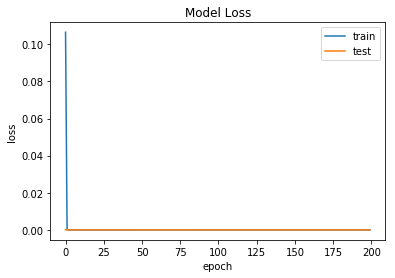

In [116]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [117]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.5934065934065934
              precision    recall  f1-score   support

           1       0.71      0.78      0.74        50
           2       0.40      0.25      0.31         8
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.43      0.43      0.43         7
           8       0.00      0.00      0.00         1
           9       0.50      0.33      0.40         3
          10       1.00      0.46      0.63        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

   micro avg       0.59      0.59      0.59        91
   macro avg       0.34      0.25      0.28        91
weighted avg       0.66      0.59      0.61        91



In [118]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91

   micro avg       1.00      1.00      1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

